In [2]:
import pandas as pd

In [4]:
df = pd.read_csv(r'/global_power_plant_database.csv')
df.head()

<ipython-input-4-0ca7c6547d8e>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'/global_power_plant_database.csv')


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.322,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.670,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.623,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.556,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.641,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1


In [6]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh_2013', 'estimated_generation_gwh_2014',
       'estimated_generation_gwh_2015', 'estimated_generation_gwh_2016',
       'estimated_generation_gwh_2017', 'estimated_generation_note_2013',
       'estimated_generation_note_2014', 'estimated_generation_note_2015',
       'estimated_generation_note_2016', 'estimated_generation_note_2017'],
      dtype='object')

Identify missing values and handle them appropriately.


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34936 entries, 0 to 34935
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         34936 non-null  object 
 1   country_long                    34936 non-null  object 
 2   name                            34936 non-null  object 
 3   gppd_idnr                       34936 non-null  object 
 4   capacity_mw                     34936 non-null  float64
 5   latitude                        34936 non-null  float64
 6   longitude                       34936 non-null  float64
 7   primary_fuel                    34936 non-null  object 
 8   other_fuel1                     1944 non-null   object 
 9   other_fuel2                     276 non-null    object 
 10  other_fuel3                     92 non-null     object 
 11  commissioning_year              17447 non-null  float64
 12  owner                           

In [8]:
missing_values = df.isnull().sum()
print(missing_values)

country                               0
country_long                          0
name                                  0
gppd_idnr                             0
capacity_mw                           0
latitude                              0
longitude                             0
primary_fuel                          0
other_fuel1                       32992
other_fuel2                       34660
other_fuel3                       34844
commissioning_year                17489
owner                             14068
source                               15
url                                  18
geolocation_source                  419
wepp_id                           18702
year_of_capacity_data             20049
generation_gwh_2013               28519
generation_gwh_2014               27710
generation_gwh_2015               26733
generation_gwh_2016               25792
generation_gwh_2017               25436
generation_gwh_2018               25299
generation_gwh_2019               25277


Let's fill missing values in all numerical columns with the mean of that column

In [28]:
# Get only the numerical columns
numerical_columns = df.select_dtypes(include='number').columns

# Fill missing values in all numerical columns with their respective means
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

Let's fill missing values in all non-numeric columns

In [30]:
non_numeric_columns = df.select_dtypes(exclude='number').columns

# Fill missing values in all non-numeric columns with 'N/A'
df[non_numeric_columns] = df[non_numeric_columns].fillna('N/A')

In [31]:
missing_values = df.isnull().sum() #check
print(missing_values)

country                           0
country_long                      0
name                              0
gppd_idnr                         0
capacity_mw                       0
latitude                          0
longitude                         0
primary_fuel                      0
other_fuel1                       0
other_fuel2                       0
other_fuel3                       0
commissioning_year                0
owner                             0
source                            0
url                               0
geolocation_source                0
wepp_id                           0
year_of_capacity_data             0
generation_gwh_2013               0
generation_gwh_2014               0
generation_gwh_2015               0
generation_gwh_2016               0
generation_gwh_2017               0
generation_gwh_2018               0
generation_gwh_2019               0
generation_data_source            0
estimated_generation_gwh_2013     0
estimated_generation_gwh_201

In [32]:
df.drop_duplicates(inplace=True)


Use NumPy to convert relevant columns to numerical types if necessary

In [9]:
df.dtypes

country                            object
country_long                       object
name                               object
gppd_idnr                          object
capacity_mw                       float64
latitude                          float64
longitude                         float64
primary_fuel                       object
other_fuel1                        object
other_fuel2                        object
other_fuel3                        object
commissioning_year                float64
owner                              object
source                             object
url                                object
geolocation_source                 object
wepp_id                            object
year_of_capacity_data             float64
generation_gwh_2013               float64
generation_gwh_2014               float64
generation_gwh_2015               float64
generation_gwh_2016               float64
generation_gwh_2017               float64
generation_gwh_2018               

In [25]:
df.wepp_id.value_counts() # shoul be int

1082676    14
1084787    13
1105009    10
1070494     9
1087949     8
           ..
1019621     1
1016893     1
1094914     1
1051784     1
1033857     1
Name: wepp_id, Length: 15263, dtype: int64

In [33]:
# Convert 'wepp_id' column to numeric
df['wepp_id'] = pd.to_numeric(df['wepp_id'], errors='coerce')

In [34]:
df.dtypes #check

country                            object
country_long                       object
name                               object
gppd_idnr                          object
capacity_mw                       float64
latitude                          float64
longitude                         float64
primary_fuel                       object
other_fuel1                        object
other_fuel2                        object
other_fuel3                        object
commissioning_year                float64
owner                              object
source                             object
url                                object
geolocation_source                 object
wepp_id                           float64
year_of_capacity_data             float64
generation_gwh_2013               float64
generation_gwh_2014               float64
generation_gwh_2015               float64
generation_gwh_2016               float64
generation_gwh_2017               float64
generation_gwh_2018               

Exploratory Data Analysis

In [35]:
numerical_columns = df.select_dtypes(include='number').columns

# Summary statistics for numerical columns
summary_stats = df[numerical_columns].describe()
print(summary_stats)

        capacity_mw      latitude     longitude  commissioning_year  \
count  34936.000000  34936.000000  34936.000000        34936.000000   
mean     163.355148     32.816637     -6.972803         1997.414823   
std      489.636072     22.638603     78.405850           16.534583   
min        1.000000    -77.847000   -179.977700         1896.000000   
25%        4.900000     29.256475    -77.641550         1997.414823   
50%       16.745000     39.727750     -2.127100         1997.414823   
75%       75.344250     46.263125     49.502675         2007.000000   
max    22500.000000     71.292000    179.388700         2020.000000   

            wepp_id  year_of_capacity_data  generation_gwh_2013  \
count  1.614400e+04           34936.000000         34936.000000   
mean   6.834034e+05            2018.218849           592.696107   
std    4.893219e+05               1.048624           932.025542   
min    1.217100e+04            2000.000000          -947.600000   
25%    5.561450e+04      

In [36]:
# Grouping by country and counting the number of power plants
plants_by_country = df.groupby('country')['name'].count().sort_values(ascending=False)

# Grouping by fuel type and counting the number of power plants
plants_by_fuel_type = df.groupby('primary_fuel')['name'].count().sort_values(ascending=False)

print("Power Plants by Country:")
print(plants_by_country)

print("\nPower Plants by Fuel Type:")
print(plants_by_fuel_type)

Power Plants by Country:
country
USA    9833
CHN    4235
GBR    2751
BRA    2360
FRA    2155
       ... 
PSE       1
DJI       1
SUR       1
ESH       1
GNB       1
Name: name, Length: 167, dtype: int64

Power Plants by Fuel Type:
primary_fuel
Solar             10665
Hydro              7156
Wind               5344
Gas                3998
Coal               2330
Oil                2320
Biomass            1430
Waste              1068
Nuclear             195
Geothermal          189
Storage             135
Other                43
Cogeneration         41
Petcoke              12
Wave and Tidal       10
Name: name, dtype: int64


Statistical Analysis

In [37]:
import numpy as np
from scipy.stats import f_oneway

fuel_types = df['primary_fuel'].unique()

# Calculating statistics for each fuel type
for fuel in fuel_types:
    data = df[df['primary_fuel'] == fuel]['generation_gwh_2018']
    mean = np.mean(data)
    variance = np.var(data)
    std_dev = np.std(data)
    print(f"Fuel Type: {fuel}")
    print(f"Mean Power Output: {mean}")
    print(f"Variance: {variance}")
    print(f"Standard Deviation: {std_dev}")
    print("-------------------------")

# Hypothesis Testing
fuel_power = [df[df['primary_fuel'] == fuel]['generation_gwh_2018'] for fuel in fuel_types]
f_stat, p_value = f_oneway(*fuel_power)
print("\nHypothesis Testing Results:")
print(f"F-Statistic: {f_stat}")
print(f"P-value: {p_value}")

alpha = 0.05  # Set your desired significance level
if p_value < alpha:
    print("Reject null hypothesis: Means are significantly different.")
else:
    print("Fail to reject null hypothesis: Means are not significantly different.")


Fuel Type: Hydro
Mean Power Output: 457.900875686667
Variance: 236936.24694578844
Standard Deviation: 486.76097516726674
-------------------------
Fuel Type: Solar
Mean Power Output: 391.08134896362264
Variance: 47854.347251081694
Standard Deviation: 218.75636505272638
-------------------------
Fuel Type: Gas
Mean Power Output: 611.099945488635
Variance: 1199104.1444849698
Standard Deviation: 1095.0361384378919
-------------------------
Fuel Type: Other
Mean Power Output: 368.62795300069683
Variance: 46792.813851096515
Standard Deviation: 216.3164668976833
-------------------------
Fuel Type: Oil
Mean Power Output: 340.16947119526304
Variance: 183850.7279493722
Standard Deviation: 428.7781803559647
-------------------------
Fuel Type: Wind
Mean Power Output: 461.727284807536
Variance: 29714.668472234098
Standard Deviation: 172.37943169715493
-------------------------
Fuel Type: Nuclear
Mean Power Output: 4582.127201714995
Variance: 47087258.96704642
Standard Deviation: 6862.01566356755

Time Series Analysis

In [ ]:
# Get unique years
years = np.sort(df['commissioning_year'].dropna().astype(int).unique())
# Get unique fuel types
fuel_types = df['primary_fuel'].unique()

# Create a 2D array to store counts of fuel types for each year
fuel_counts_by_year = np.zeros((len(years), len(fuel_types)))

# Count occurrences of each fuel type for each year
for i, year in enumerate(years):
    year_data = df[df['commissioning_year'] == year]
    for j, fuel in enumerate(fuel_types):
        fuel_counts_by_year[i, j] = np.sum(year_data['primary_fuel'] == fuel)

# Calculate proportions for each fuel type for each year
total_plants_by_year = np.sum(fuel_counts_by_year, axis=1)
fuel_proportions_by_year = fuel_counts_by_year / total_plants_by_year[:, None]

# Analyze trends of fuel types over time
for j, fuel in enumerate(fuel_types):
    print(f"Fuel Type: {fuel}")
    print(f"Proportions Over Years:")
    for i, year in enumerate(years):
        print(f"Year {year}: {fuel_proportions_by_year[i, j]}")
    print("-------------------------")


Advanced Visualization:

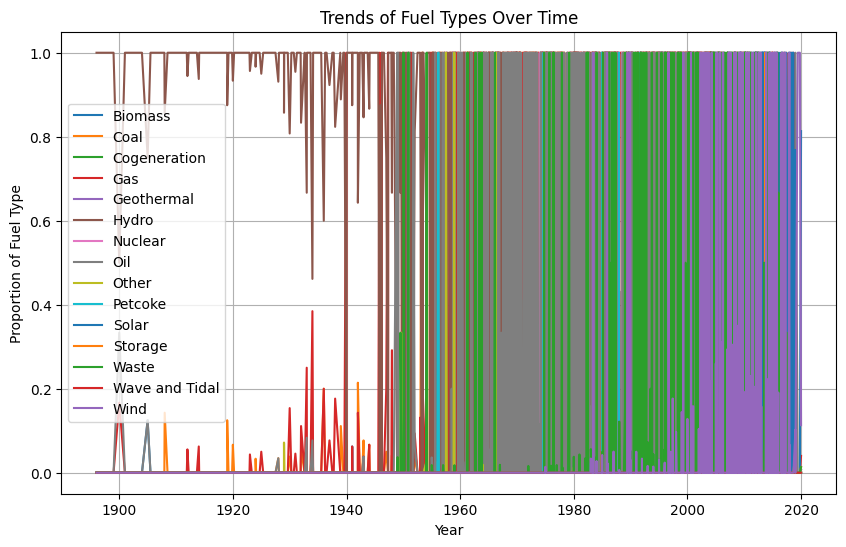

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Group data by year and fuel type, then count occurrences
fuel_year_counts = df.groupby(['commissioning_year', 'primary_fuel']).size().unstack(fill_value=0)

# Calculate proportions of each fuel type for each year
fuel_year_proportions = fuel_year_counts.div(fuel_year_counts.sum(axis=1), axis=0)

plt.figure(figsize=(10, 6))

for fuel in fuel_year_proportions.columns:
    plt.plot(fuel_year_proportions.index, fuel_year_proportions[fuel], label=fuel)

plt.xlabel('Year')
plt.ylabel('Proportion of Fuel Type')
plt.title('Trends of Fuel Types Over Time')
plt.legend()
plt.grid(True)
plt.show()



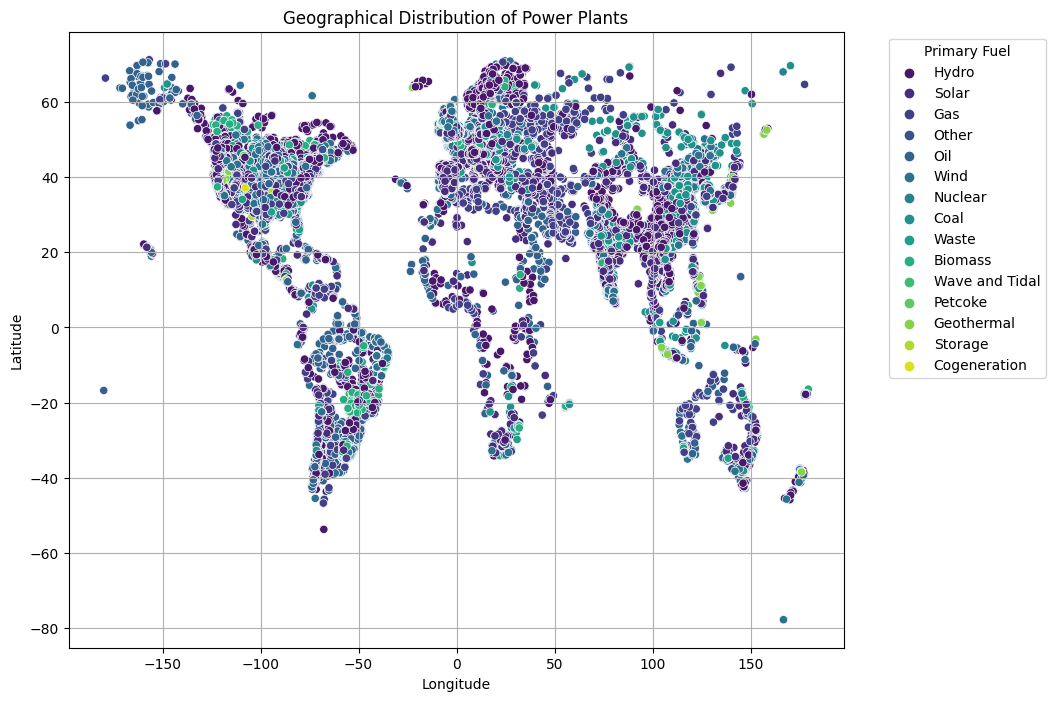

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'latitude' and 'longitude' columns contain geographic data
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=df, hue='primary_fuel', palette='viridis', legend='full')
plt.title('Geographical Distribution of Power Plants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Primary Fuel', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


Matrix operations in real world context

In [47]:
import numpy as np
import pandas as pd

columns_of_interest = ['capacity_mw', 'latitude', 'longitude', 'primary_fuel']
relevant_data = df[columns_of_interest]

# Convert categorical 'primary_fuel' to numerical representation using one-hot encoding
encoded_fuel = pd.get_dummies(relevant_data['primary_fuel'])

# Combine numerical columns and encoded fuel types into a single feature matrix
feature_matrix = pd.concat([relevant_data.drop('primary_fuel', axis=1), encoded_fuel], axis=1).to_numpy()

# Calculating the covariance matrix
cov_matrix = np.cov(feature_matrix.T)
print(cov_matrix)

[[ 2.39743483e+05 -1.46512725e+02  5.81707732e+03 -5.70535451e+00
   4.53677832e+01 -7.58425952e-02  2.40434155e+01 -5.20577443e-01
  -3.31500840e+00  1.07644914e+01 -3.35208912e+00 -9.76502465e-02
   1.32908466e-02 -4.44788988e+01 -5.82242592e-01 -4.57176425e+00
  -3.09532411e-02 -1.74585997e+01]
 [-1.46512725e+02  5.12506327e+02 -1.21328995e+02 -5.16553820e-01
  -4.37421144e-04  6.58447093e-03 -1.11132236e-01 -1.76234135e-02
  -5.08434124e-01  3.20927359e-02 -1.22232779e+00  7.67473646e-03
  -7.01303604e-04  1.49464462e+00  3.49582549e-02  1.95846455e-01
   5.77623965e-03  5.99632593e-01]
 [ 5.81707732e+03 -1.21328995e+02  6.14747738e+03 -9.97931668e-01
   4.58616339e+00 -8.87369734e-02 -2.00755654e+00 -3.05683435e-02
   3.08970316e-01  6.46993113e-02 -2.45988512e+00 -3.90021113e-02
  -2.92406000e-02  1.89019172e+00 -2.74185091e-01 -9.82502673e-01
   2.92773817e-03  5.66566379e-02]
 [-5.70535451e+00 -5.16553820e-01 -9.97931668e-01  3.92576858e-02
  -2.72997099e-03 -4.80381161e-05 -4.

In [48]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)


Eigenvectors represent directions of maximum variance in the data.
Eigenvalues indicate the amount of variance explained by each eigenvector.

The eigenvector with the largest eigenvalue represents the direction of maximum variance.
This might reveal which attributes contribute most significantly to the variability in the dataset.


Integrating NumPy with Pandas and Matplotlib

NumPy arrays can enhance data manipulation in Pandas, especially for complex filtering operations.

In [49]:
filtered_data = df[np.logical_and(df['capacity_mw'] > 500, df['primary_fuel'] == 'Coal')]
 #using numpy for filtering in pandas


NumPy can assist in creating sophisticated plots in Matplotlib, especially in manipulating data for visualizations.

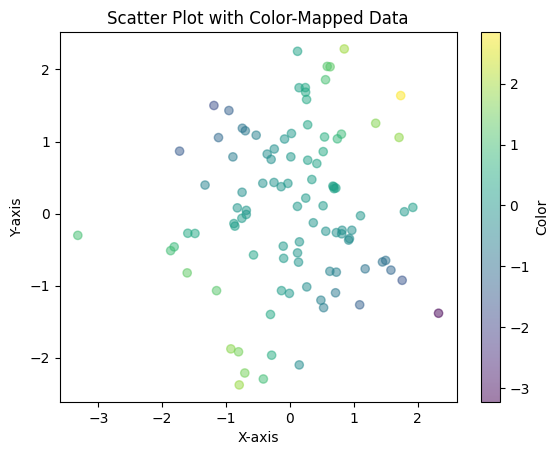

In [50]:
import matplotlib.pyplot as plt

x = np.random.randn(100)
y = np.random.randn(100)

plt.scatter(x, y, c=x*y, cmap='viridis', alpha=0.5)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot with Color-Mapped Data')
plt.colorbar(label='Color')
plt.show()